In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import yfinance as yf
tickers = ['^KS11', '039490.KS']

all_data = {}
for ticker in tickers:
    all_data[ticker] = yf.download(ticker , start = '2016-01-01' , end='2023-12-31')

prices = pd.DataFrame({tic:data['Close'] for tic , data in all_data.items()})
prices.head()


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


,^KS11,039490.KS
Date,,
2016-01-04,1918.760010,59800.0
2016-01-05,1930.530029,61500.0
2016-01-06,1925.430054,61100.0
2016-01-07,1904.329956,59500.0
2016-01-08,1917.619995,59700.0


In [12]:
ret = prices.pct_change().dropna()
ret['intercept'] = 1

ret.head()

,^KS11,039490.KS,intercept
Date,,,
2016-01-05,0.006134,0.028428,1
2016-01-06,-0.002642,-0.006504,1
2016-01-07,-0.010959,-0.026187,1
2016-01-08,0.006979,0.003361,1
2016-01-11,-0.011879,-0.028476,1


In [16]:
import statsmodels.api as sm 


reg = sm.OLS(ret[['039490.KS']] , ret[['^KS11', 'intercept']]).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              039490.KS   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     1127.
Date:                Thu, 13 Jun 2024   Prob (F-statistic):          1.30e-195
Time:                        15:43:35   Log-Likelihood:                 4888.9
No. Observations:                1961   AIC:                            -9774.
Df Residuals:                    1959   BIC:                            -9763.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
^KS11          1.4320      0.043     33.575      0.000       1.348       1.516
intercept      0.0003      0.000      0.568      0.570      -0.001       0.001
==============================================================================
Omnibus:                      372.424   Durbin-Watson:                   2.189
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9860.402
Skew:                          -0.044   Prob(JB):                         0.00
Kurtosis:                      13.985   Cond. No.                         94.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# 이 회귀분석은 고베타 증권주에 대해 36% 정도 설명해주고 , 회귀분석은 유의미하다. (1.30e-195니까)
# 베타는 여기서 1.43가 된다. 즉 주식시장이 1단위 움직이면 고베타 증권주가 1.43단위 움직인다는 것 
# 베타는 1을 기준으로 1보다 크면 고베타 , 1보다 작으면 저베타라고 한다. 주식 경기가 좋아서 상승장이 기대될 때는 고베타, 아닐 때는 저베타로 가는 게 좋다. 
#절편의 경우, p 값이 매우 큰데(0.57) , 절편이 0이다라는 가설을 기각하지 못한다. 0일 수로 있다는 거니까 이 것의 영향이 없다고 보는 게 좋다. 이 고베타 주의 경우, 주식시장에 대한 노출도인 베타를 제외하고 나면 초과 수익은 없다없다

In [25]:
#가치주 효과 : 내재 가치 대비 낮은 가격의 주식(낮은 per , 낮은 pbs)이 내재가치가 높은 주식보다 수익률이 높은 현상

In [27]:
!pip install pandas_datareader
import pandas_datareader.data as web 
from pandas_datareader.famafrench import get_available_datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 1.2 MB/s eta 0:00:00a 0:00:01


In [36]:
datasets = get_available_datasets()
datasets[1:20]

import pandas_datareader.data as web

df_pbr = web.DataReader('Portfolios_Formed_on_BE-ME' , 'famafrench', start = '1900-01-01')


/var/folders/9g/6l4kllks7p76ksrkbq5gc8tr0000gn/T/ipykernel_9279/807604969.py:6: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_pbr = web.DataReader('Portfolios_Formed_on_BE-ME' , 'famafrench', start = '1900-01-01')
/var/folders/9g/6l4kllks7p76ksrkbq5gc8tr0000gn/T/ipykernel_9279/807604969.py:6: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_pbr = web.DataReader('Portfolios_Formed_on_BE-ME' , 'famafrench', start = '1900-01-01')
/var/folders/9g/6l4kllks7p76ksrkbq5gc8tr0000gn/T/ipykernel_9279/807604969.py:6: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and th

In [40]:
df_pbr[0].head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
Date,,,,,,,,,,,,,,,,,,,
1926-07,12.07,5.55,1.86,1.54,3.18,5.41,1.78,2.41,0.60,4.63,1.22,11.38,1.68,1.50,2.12,2.40,2.45,0.63,0.52
1926-08,-9.73,2.65,2.67,5.61,1.00,4.01,2.05,4.59,7.10,0.15,2.19,6.39,2.38,1.58,2.62,4.77,4.17,8.31,3.92
1926-09,-15.16,1.28,0.07,-0.71,-1.04,3.04,-0.29,-0.19,-1.46,-0.11,-2.32,6.30,0.73,-0.89,0.40,-0.28,0.04,-2.16,0.44
1926-10,-5.63,-3.60,-2.41,-3.55,-2.89,-2.96,-2.20,-4.20,-4.28,-3.78,-1.67,-5.01,-1.41,-2.31,-2.07,-4.77,-2.84,-5.46,-1.17
1926-11,5.58,3.13,2.95,2.94,4.12,2.56,1.90,3.96,2.48,6.03,1.51,1.10,3.63,1.97,1.81,4.20,3.39,2.77,1.76


In [55]:
import matplotlib.pyplot as plt
from matplotlib import cm

plt.rc('font', family = 'arial')

In [56]:
plt.rc('axes', unicode_minus = False)

df_pbr_vw = df_pbr[0].loc[:, ['Lo 20', 'Qnt 2', 'Qnt 3' ,'Qnt 4','Hi 20']]

df_pbr_cum = (1 +df_pbr_vw/100).cumprod() 

<Axes: xlabel='Date'>

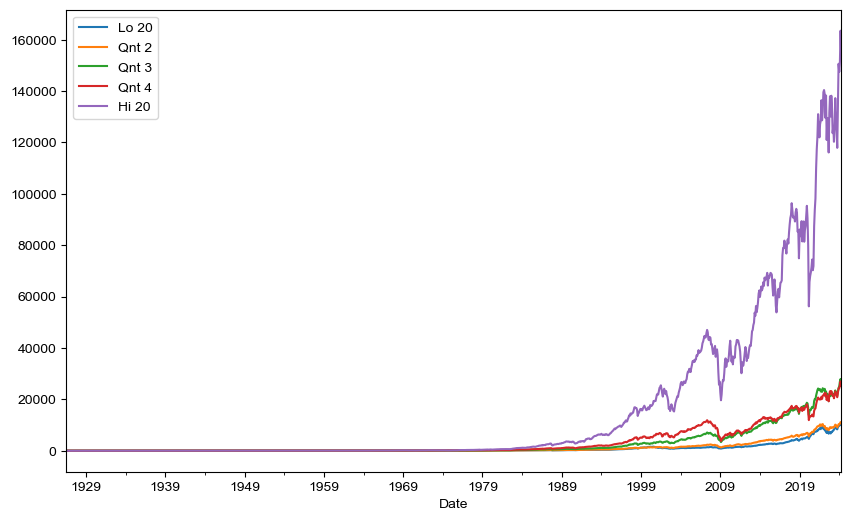

In [58]:
df_pbr_cum.plot(figsize = (10,6) )

<Axes: xlabel='Date'>

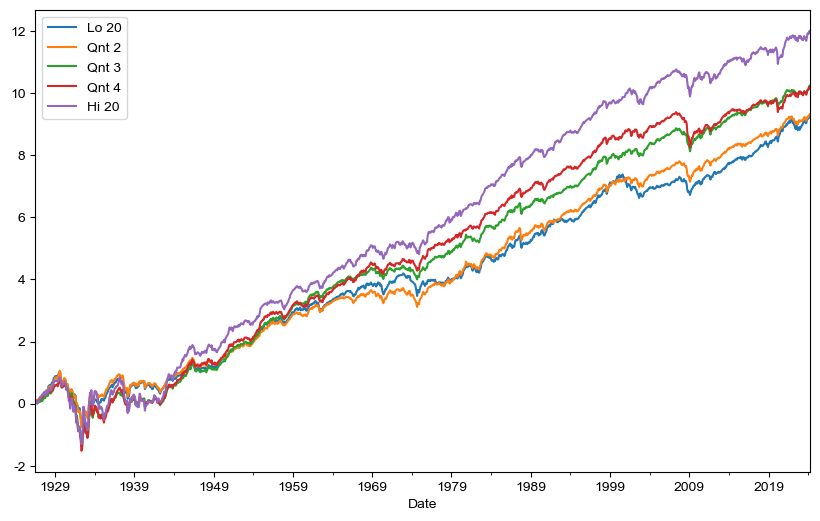

In [61]:
import numpy as np 

df_pbr_cum = np.log(1+df_pbr_vw/100).cumsum()
df_pbr_cum.plot(figsize = (10,6))

In [95]:
import pandas as pd 
import numpy as np

def factor_stat(df):

    n = len(df) 

    ret_ari = (df/100).mean(axis = 0)*12 #산술평균
    ret_geo = (1+df/100).prod()**(12/n)-1 #기하평균 : 각 수익률을 곱한후 개수만큼 제곱근을 취해줌. 기하의 경우 곱셈이기 때문에 변동폭이 큰 숫자가 들어가면 크게 반영된다
    vol = (df/100).std(axis=0)*np.sqrt(12) #변동성變動性
    sharp = ret_ari/vol #샤프지수 (위험대비수익을 표현)

    stat = pd.DataFrame([ret_ari, ret_geo, vol, sharp], index = ['연율화 수익률(산술)','연율화 수익률(기하)'
    , '연율화 변동성', '샤프지수']).round(4)

    stat.iloc[0:3,] = stat.iloc[0:3, ]*100
    return stat 

In [97]:
factor_stat(df_pbr_vw)

,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20
연율화 수익률(산술),11.240,11.2600,12.3100,12.810,15.880
연율화 수익률(기하),9.880,9.9800,10.9800,10.930,12.980
연율화 변동성,18.830,18.5600,19.4800,22.320,27.720
샤프지수,0.597,0.6069,0.6323,0.574,0.573


**가치주의 수익률이 높다는 사실을 확인하는 과정**


각 수익률을 비율로 변환:

10% → 1.10
20% → 1.20
-10% → 0.90
기하 평균 계산:
기하 평균
=
(
1.10
×
1.20
×
0.90
)
1
3
≈
1.0595
기하 평균=(1.10×1.20×0.90) 
3
1
​
 
 ≈1.0595
 